### Packages Needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Create Forest Fire Summary

In [9]:
#Watershed and area array
Watersheds=['Spius','Chilko','Chilcotin','Nation','Osilinka','Mesilinka','Stellako','Nautley']
Area=[777,6876,19206,6790,1928,2988,4020,6552]

#create fire summary for each watershed
for c, WS in enumerate(Watersheds):
    # initiate fire summary dataframe
    Fire_Summary=pd.DataFrame({'Year':[],'Tot_Area_Burned':[],'Percent':[],'Num_of_Fires_10km':[]})
    
    #read in forest fire excel sheet containing forest fires since 1980 (extracted from forest fire database from Gov. of BC)
    Tb= pd.read_excel('D:/UNBC/HydroMet_Project/Data/ForestFires/%s_1980.xlsx'%WS)
    
    #find all years that had fires
    FY= np.unique(Tb.FIRE_YEAR)
    
    #loop through years where fires occurred
    for Y in FY:
        
        Working= Tb[Tb.FIRE_YEAR==Y]
        
        #sum fire area over the whole year
        F_tot= np.sum(Working['Area(km2)'])
        
        #calculate percent burned in watershed
        Per=F_tot/Area[c]*100
        
        #how many unique fires are there
        F_Numbers = np.unique(Working.FIRE_NO)
        
        #determine how many fires greater than 10km2 occurred
        count=0
        for n in F_Numbers:
            U= np.sum(Working[Working.FIRE_NO==n]['Area(km2)'])
            if U >= 10:
                count= count+1
                
        # record results
        Fire_Summary=Fire_Summary.append({'Year':Y,'Tot_Area_Burned': F_tot,'Num_of_Fires_10km':count,'Percent':Per},ignore_index=True)
        
    #save fire summary for each watershed    
    Fire_Summary.to_csv('D:/UNBC/HydroMet_Project/Data/ForestFires/Fire_Summary/%s.csv'%WS)


### Plotting number of forest fires

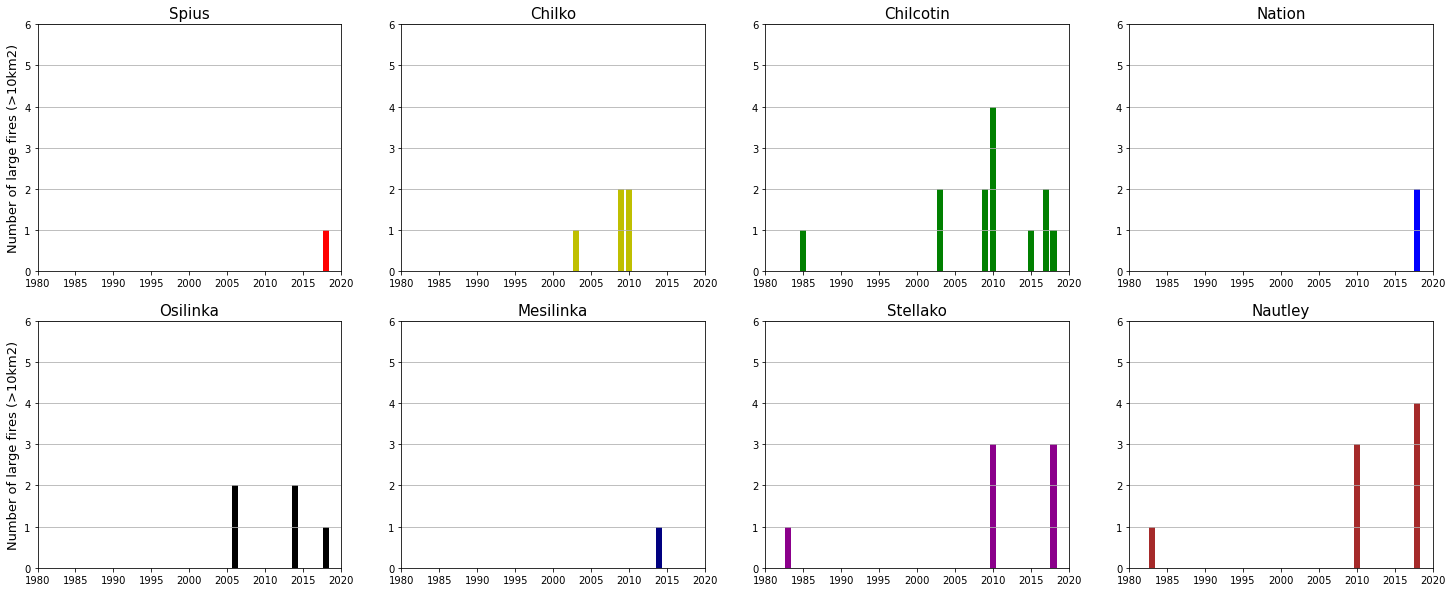

In [3]:
#arrays of watersheds and area
Watersheds=['Spius','Chilko','Chilcotin','Nation','Osilinka','Mesilinka','Stellako','Nautley']
Area=[775,6800,19200,6790,1950,3060,4020,6552]

#plotting initilization
color=['r','y','g','b','k','navy','darkmagenta','brown']
xi=[0,0,0,0,1,1,1,1]
yi=[0,1,2,3,0,1,2,3]
fig,ax=plt.subplots(2,4,figsize=(25,10))

#plotting
for count,WS in enumerate(Watersheds):
    
    #open forest fire summary for a watershed
    F= pd.read_csv('D:/UNBC/HydroMet_Project/Data/ForestFires/Fire_Summary/%s.csv'%WS)
    
    #select panel to plot in
    x=xi[count];y=yi[count]
    
    # plot of year and number of fires greater than 10km2
    ax[x,y].bar(F.Year,F.Num_of_Fires_10km, color=color[count], label=WS)
    
    #plotting parameters
    ax[x,y].set_title(WS,fontsize=15)
    ax[x,y].set_ylim(0,6)
    ax[x,y].set_xlim(1980,2020)
    ax[x,y].grid(axis='y')
    if y==0:
        ax[x,y].set_ylabel('Number of large fires (>10km2)',fontsize=13)
